In [1]:
import pandas as pd
import numpy as np

In [2]:
# Main churn dataset
churn_df = pd.read_csv("telecom_customer_churn.csv")

# Pincode dataset
pincode_df = pd.read_csv("telecom_zipcode_population.csv")


In [3]:
raw_df = churn_df.copy()

In [4]:
print(churn_df.shape)
print(churn_df.head())

(7043, 38)
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra

In [5]:
print(pincode_df.shape)
print(pincode_df.head())

(1671, 2)
   Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019


In [6]:
# Convert TotalCharges to numeric
churn_df["Total Charges"] = pd.to_numeric(
    churn_df["Total Charges"], errors="coerce"
)

churn_df["Total Charges"] = churn_df["Total Charges"].fillna(
    churn_df["Total Charges"].median()
)

In [7]:
print(churn_df["Zip Code"].dtype)
print(pincode_df["Zip Code"].dtype)


int64
int64


In [8]:
df = churn_df.merge(
    pincode_df,
    on="Zip Code",
    how="left"
)


Left join ensures no customers are lost

Geographic data is optional enrichment

Missing population values won’t break model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [10]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [11]:
leakage_cols = [
    "Churn Category",
    "Churn Reason",
    "Customer Status"
]

df.drop(columns=leakage_cols, inplace=True, errors="ignore")


In [12]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [13]:
internet_cols = [
    "Internet Type", "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support",
    "Streaming TV", "Streaming Movies", "Streaming Music",
    "Unlimited Data"
]

df[internet_cols] = df[internet_cols].fillna("No")

df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0)
df["Multiple Lines"] = df["Multiple Lines"].fillna("No")
df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(0)
df["Offer"] = df["Offer"].fillna("No Offer")


In [14]:
df["AvgMonthlySpend"] = df["Total Charges"] / df["Tenure in Months"]
df["AvgMonthlySpend"] = df["AvgMonthlySpend"].replace([np.inf, -np.inf], 0)


In [15]:
df["IsShortTenure"] = (df["Tenure in Months"] < 12).astype(int)


In [16]:
df["IsLongTermContract"] = df["Contract"].isin(
    ["One Year", "Two Year"]
).astype(int)


In [17]:
df["AutoPaymentFlag"] = df["Payment Method"].str.contains(
    "automatic", case=False, na=False
).astype(int)


In [18]:
df["HighMonthlyCharge"] = (
    df["Monthly Charge"] > df["Monthly Charge"].median()
).astype(int)


In [19]:
service_cols = [
    "Phone Service", "Multiple Lines", "Online Security",
    "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV",
    "Streaming Movies", "Streaming Music"
]

df["ServiceCount"] = df[service_cols].apply(
    lambda x: (x == "Yes").sum(), axis=1
)


In [20]:
df["HighDataUser"] = (
    df["Avg Monthly GB Download"] > 
    df["Avg Monthly GB Download"].median()
).astype(int)


In [21]:
df["UnlimitedDataFlag"] = (df["Unlimited Data"] == "Yes").astype(int)


In [22]:
df["CustomerLifetimeValue"] = (
    df["Total Revenue"] - df["Total Refunds"]
)


In [23]:
df["HasReferrals"] = (df["Number of Referrals"] > 0).astype(int)


In [24]:
df["PopulationBucket"] = pd.qcut(
    df["Population"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [25]:
df["HighDensityArea"] = (
    df["Population"] > df["Population"].median()
).astype(int)


In [26]:
drop_cols = [
    "Customer ID", "Zip Code", "Latitude", "Longitude"
]

df.drop(columns=drop_cols, inplace=True, errors="ignore")


In [27]:
city_counts = raw_df["City"].value_counts()
valid_cities = city_counts[city_counts >= 30].index
city_churn = (
    raw_df[raw_df["City"].isin(valid_cities)]
    .groupby("City")["Customer Status"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .sort_values("Churned", ascending=False)
)

city_churn.head(10)



Customer Status,Churned,Joined,Stayed
City,,,
San Diego,0.649123,0.024561,0.326316
Fallbrook,0.604651,0.046512,0.348837
Temecula,0.578947,0.052632,0.368421
Glendale,0.325000,0.150000,0.525000
Escondido,0.313725,0.058824,0.627451
Pasadena,0.300000,0.000000,0.700000
San Francisco,0.298077,0.067308,0.634615
Berkeley,0.281250,0.031250,0.687500
Stockton,0.272727,0.068182,0.659091


In [28]:
city_summary = raw_df.groupby("City").agg(
    churn_rate=("Customer Status", lambda x: (x == "Churned").mean()),
    customer_count=("Customer Status", "count")
)

city_summary = city_summary[city_summary["customer_count"] >= 30]
city_summary.sort_values("churn_rate", ascending=False).head(10)

,churn_rate,customer_count
City,,
San Diego,0.649123,285
Fallbrook,0.604651,43
Temecula,0.578947,38
Glendale,0.325000,40
Escondido,0.313725,51
Pasadena,0.300000,30
San Francisco,0.298077,104
Berkeley,0.281250,32
Stockton,0.272727,44


In [29]:
df.drop(columns=["City"], inplace=True, errors="ignore")


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


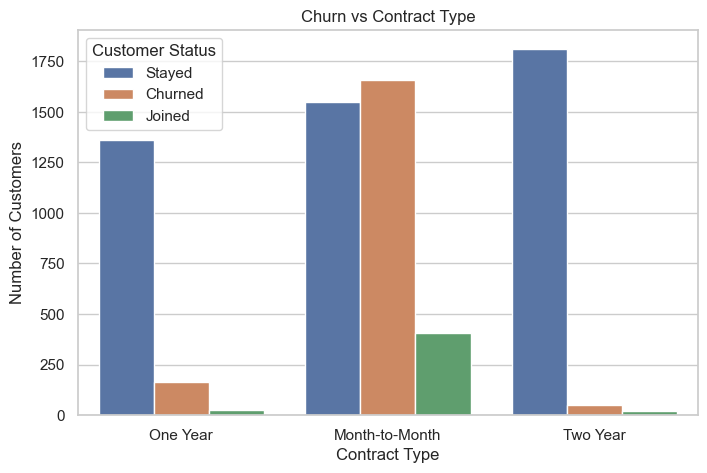

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=raw_df,
    x="Contract",
    hue="Customer Status"
)
plt.title("Churn vs Contract Type")
plt.ylabel("Number of Customers")
plt.xlabel("Contract Type")
plt.show()


In [34]:
service_cols = [
    "Phone Service", "Multiple Lines", "Online Security",
    "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV",
    "Streaming Movies", "Streaming Music"
]
raw_df["ServiceCount"] = raw_df[service_cols].apply(
    lambda x: (x == "Yes").sum(),
    axis=1
)


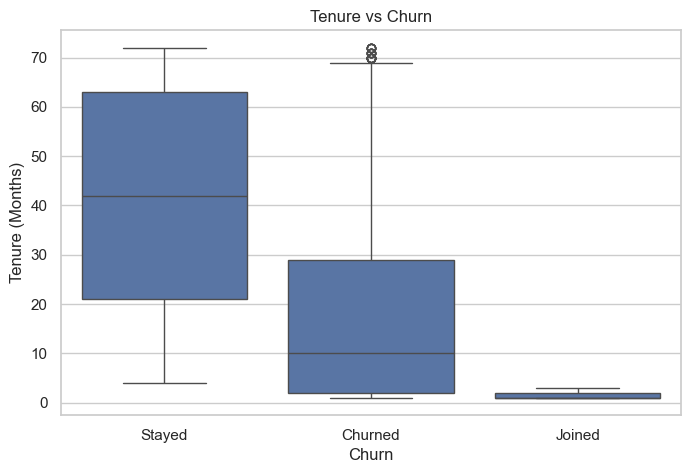

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=raw_df,
    x="Customer Status",
    y="Tenure in Months"
)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


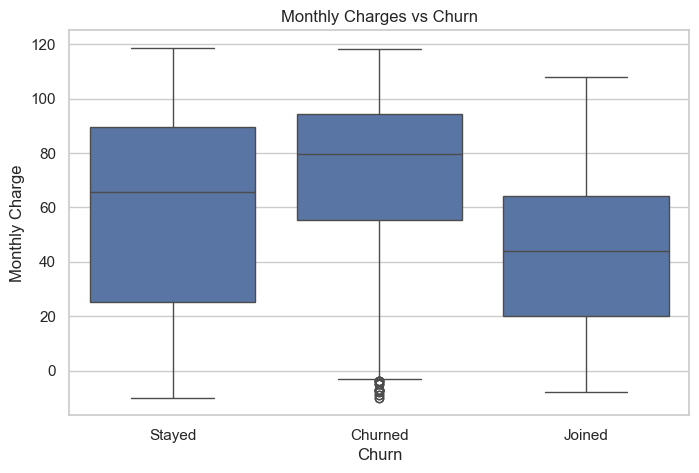

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=raw_df,
    x="Customer Status",
    y="Monthly Charge"
)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charge")
plt.show()


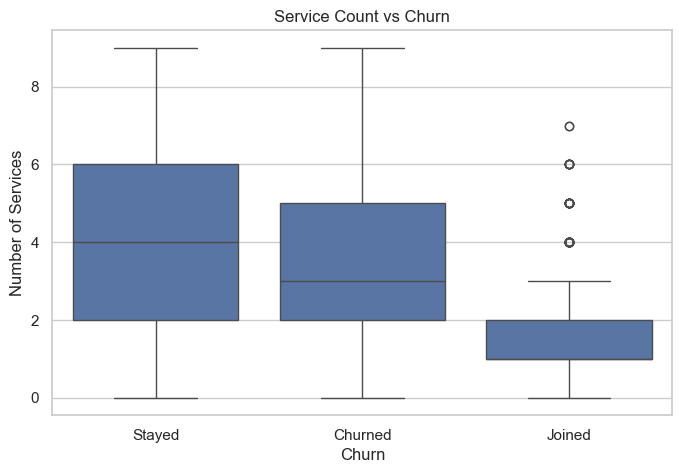

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=raw_df,
    x="Customer Status",
    y="ServiceCount"
)
plt.title("Service Count vs Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Services")
plt.show()


In [38]:
model_df = raw_df.copy()

In [39]:
model_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'ServiceCount'],
      dtype='object')

In [40]:
model_df = model_df[model_df["Customer Status"] != "Joined"]


In [41]:
model_df["Churn"] = (model_df["Customer Status"] == "Churned").astype(int)


In [42]:
model_df.drop(columns=["Customer Status"], inplace=True)


In [43]:
model_df["Churn"].value_counts(normalize=True)


Churn
0    0.716345
1    0.283655
Name: proportion, dtype: float64

In [44]:
X = model_df.drop("Churn", axis=1)
y = model_df["Churn"]


In [45]:
drop_cols = [
    "Churn Category",
    "Churn Reason",
    "Total Revenue",
    "Total Charges",
    "Total Refunds",
    "Total Extra Data Charges",
    "Total Long Distance Charges",
    "Customer ID",
    "City",
    "Zip Code",
    "Latitude",
    "Longitude"
]

In [46]:
X = X.drop(columns=[c for c in drop_cols if c in X.columns])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [48]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns


In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    drop="first",
    handle_unknown="ignore",
    sparse_output=False
)

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])


In [51]:
import numpy as np

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])


In [52]:
np.isnan(X_train_final).sum(), np.isnan(X_test_final).sum()

(np.int64(1588), np.int64(400))

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_final = imputer.fit_transform(X_train_final)
X_test_final = imputer.transform(X_test_final)


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_final, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_lr = lr.predict(X_test_final)
y_prob_lr = lr.predict_proba(X_test_final)[:, 1]


In [56]:
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       944
           1       0.72      0.69      0.70       374

    accuracy                           0.83      1318
   macro avg       0.80      0.79      0.79      1318
weighted avg       0.83      0.83      0.83      1318

ROC-AUC: 0.9102946841294299


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rf = rf.predict(X_test_final)
y_prob_rf = rf.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       944
           1       0.70      0.79      0.74       374

    accuracy                           0.84      1318
   macro avg       0.80      0.83      0.81      1318
weighted avg       0.85      0.84      0.84      1318

ROC-AUC: 0.922564692286776


In [59]:
from sklearn.metrics import recall_score, precision_score

comparison = {
    "Logistic Recall": recall_score(y_test, y_pred_lr),
    "RandomForest Recall": recall_score(y_test, y_pred_rf),
    "Logistic ROC-AUC": roc_auc_score(y_test, y_prob_lr),
    "RandomForest ROC-AUC": roc_auc_score(y_test, y_prob_rf)
}

comparison


{'Logistic Recall': 0.6925133689839572,
 'RandomForest Recall': 0.786096256684492,
 'Logistic ROC-AUC': 0.9102946841294299,
 'RandomForest ROC-AUC': 0.922564692286776}

In [60]:
feature_names = list(num_cols) + list(encoder.get_feature_names_out(cat_cols))

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
3,Tenure in Months,0.209966
39,Contract_Two Year,0.123264
2,Number of Referrals,0.115844
1,Number of Dependents,0.056339
6,Monthly Charge,0.051200
38,Contract_One Year,0.048287
0,Age,0.033056
22,Online Security_Yes,0.030369
20,Internet Type_Fiber Optic,0.030007
4,Avg Monthly Long Distance Charges,0.025576


In [61]:
import numpy as np
from sklearn.metrics import recall_score, precision_score

thresholds = np.arange(0.2, 0.6, 0.05)

for t in thresholds:
    preds = (y_prob_rf >= t).astype(int)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    print(f"Threshold {t:.2f} | Recall: {recall:.2f} | Precision: {precision:.2f}")


Threshold 0.20 | Recall: 0.97 | Precision: 0.48
Threshold 0.25 | Recall: 0.96 | Precision: 0.52
Threshold 0.30 | Recall: 0.93 | Precision: 0.58
Threshold 0.35 | Recall: 0.89 | Precision: 0.61
Threshold 0.40 | Recall: 0.85 | Precision: 0.64
Threshold 0.45 | Recall: 0.83 | Precision: 0.67
Threshold 0.50 | Recall: 0.79 | Precision: 0.70
Threshold 0.55 | Recall: 0.73 | Precision: 0.73


In [62]:
optimal_threshold = 0.35

y_pred_final = (y_prob_rf >= optimal_threshold).astype(int)


In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.95      0.78      0.85       944
           1       0.61      0.89      0.72       374

    accuracy                           0.81      1318
   macro avg       0.78      0.83      0.79      1318
weighted avg       0.85      0.81      0.82      1318

[[732 212]
 [ 42 332]]


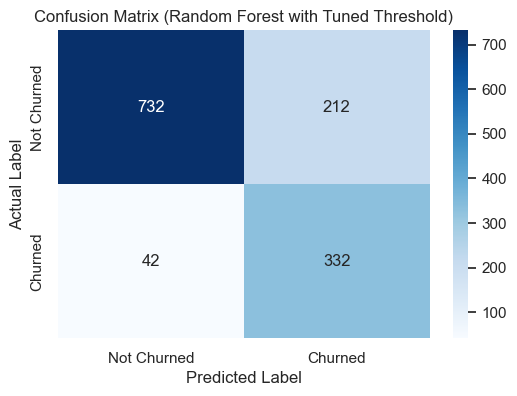

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_final)
cm
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Churned", "Churned"],
    yticklabels=["Not Churned", "Churned"]
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Random Forest with Tuned Threshold)")
plt.show()



In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy=0.8,
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_final, y_train
)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


Before SMOTE: Churn
0    3776
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    3776
1    3020
Name: count, dtype: int64


In [67]:
rf.fit(X_train_smote, y_train_smote)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rf = rf.predict(X_test_final)
y_prob_rf = rf.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       944
           1       0.72      0.76      0.74       374

    accuracy                           0.85      1318
   macro avg       0.81      0.82      0.82      1318
weighted avg       0.85      0.85      0.85      1318

ROC-AUC: 0.9223465965739146


In [69]:
final_output = X_test.copy()
final_output["Churn_Probability"] = y_prob_rf
final_output["Risk_Level"] = pd.cut(
    final_output["Churn_Probability"],
    bins=[0, 0.4, 0.7, 1],
    labels=["Low", "Medium", "High"]
)

final_output.head()


,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,ServiceCount,Churn_Probability,Risk_Level
4196,Male,33,Yes,2,4,13,NaN,Yes,13.77,Yes,...,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,72.80,6,0.154984,Low
5678,Female,73,No,0,0,1,Offer E,Yes,22.50,No,...,No,No,No,Month-to-Month,Yes,Bank Withdrawal,69.95,1,0.984058,High
2267,Female,35,No,0,0,16,Offer D,Yes,20.65,No,...,NaN,NaN,NaN,One Year,No,Credit Card,20.10,1,0.077279,Low
6252,Male,55,Yes,0,1,33,Offer C,Yes,26.80,No,...,Yes,Yes,No,Month-to-Month,No,Bank Withdrawal,91.25,4,0.726085,High
1822,Male,58,Yes,0,0,67,Offer A,Yes,29.24,Yes,...,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,111.30,8,0.514919,Medium


In [70]:
def retention_action(risk):
    if risk == "High":
        return "Offer discount / Long-term plan"
    elif risk == "Medium":
        return "Engagement email / Call"
    else:
        return "No action needed"

final_output["Suggested_Action"] = final_output["Risk_Level"].apply(retention_action)


In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_final)


C:\Users\Reddy\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

X_test_df = pd.DataFrame(
    X_test_final,
    columns=feature_names
)


In [ ]:
shap.summary_plot(
    shap_values[:, :, 1],   # class 1 = churn
    X_test_df
)


In [ ]:
idx = 10  # customer index

single_exp = shap.Explanation(
    values=shap_values[1][idx],              # 1D array (n_features,)
    base_values=explainer.expected_value[1], # scalar
    data=X_test_df.iloc[idx].values,          # feature values
    feature_names=X_test_df.columns.tolist()
)

shap.plots.waterfall(single_exp)


In [ ]:
# Save artifacts (TRAINING TIME)
import joblib

joblib.dump(rf, "model.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(num_cols, "num_cols.pkl")
joblib.dump(cat_cols, "cat_cols.pkl")
joblib.dump(feature_names, "feature_names.pkl")
threshold = optimal_threshold
joblib.dump(threshold, "threshold.pkl")
feature_names = list(num_cols) + list(encoder.get_feature_names_out(cat_cols))
joblib.dump(feature_names, "feature_names.pkl")

In [ ]:
import os
os.getcwd()

In [ ]:
os.listdir()

In [ ]:
import os

project_path = "C:/Users/Reddy/customer_churn"
os.makedirs(project_path, exist_ok=True)

project_path


In [ ]:
import joblib

joblib.dump(rf, "C:/Users/Reddy/customer_churn/model.pkl")
joblib.dump(encoder, "C:/Users/Reddy/customer_churn/encoder.pkl")
joblib.dump(scaler, "C:/Users/Reddy/customer_churn/scaler.pkl")
joblib.dump(imputer, "C:/Users/Reddy/customer_churn/imputer.pkl")
joblib.dump(num_cols, "C:/Users/Reddy/customer_churn/num_cols.pkl")
joblib.dump(cat_cols, "C:/Users/Reddy/customer_churn/cat_cols.pkl")
joblib.dump(threshold, "C:/Users/Reddy/customer_churn/threshold.pkl")
joblib.dump(feature_names, "C:/Users/Reddy/customer_churn/feature_names.pkl")

In [ ]:
import sys
sys.executable

